In [1]:
import pandas as pd
import numpy as np


In [2]:
# Import the os module
import os
# Get the current working directory
cwd = os.getcwd()
cwd

'C:\\Users\\kylia\\OneDrive\\Msc BAM\\Thesis\\Data'

In [3]:
train = pd.read_csv('train_2405.csv')
test = pd.read_csv('test_2405.csv')

In [4]:
train.head()

,ISIN,year,scope_total,NPPE,Debt_TotCap,GMAR,gsector,INTAN_TA,Capex_NPPE,Rev_Emp,FuelInten,Age,CapInt
0,AU000000IGO4,2018,85165.0,1563598.0,7.34,27.44,15,0.000000,0.116813,3188.303279,74.2,6.493696,2.104613
1,AU000000IGO4,2017,90225.0,1717857.0,10.21,35.61,15,0.000000,0.157273,937.613333,71.9,20.887260,4.444173
2,AT0000831706,2013,1835695.0,1663283.0,47.91,26.97,15,0.202389,0.073322,223.908434,15.9,19.029233,1.414618
3,AT0000831706,2015,2064000.0,1614874.0,44.19,29.98,15,0.190960,0.078928,187.969203,15.5,20.367196,1.378759
4,AT0000746409,2014,2256000.0,9436551.0,41.25,36.81,55,0.065026,0.059354,870.733744,14.4,40.898307,6.142191


In [5]:
train['year_i']=train['year']
test['year_i']=test['year']
train = train.set_index(['ISIN', 'year_i'])
test = test.set_index(['ISIN', 'year_i'])

In [6]:
# one hot encoding gsector
train = pd.get_dummies(train, columns = ['gsector'])
train = pd.DataFrame(train)
train = pd.get_dummies(train, columns = ['year'])
train = pd.DataFrame(train)

test = pd.get_dummies(test, columns = ['gsector'])
test = pd.DataFrame(test)
test = pd.get_dummies(test, columns = ['year'])
test = pd.DataFrame(test)

In [7]:
train['Rev_Emp'] = np.log(train['Rev_Emp']) 
train['scope_total'] = np.log(train['scope_total']) 
train['NPPE'] = np.log(train['NPPE']) 

test['Rev_Emp'] = np.log(test['Rev_Emp']) 
test['scope_total'] = np.log(test['scope_total']) 
test['NPPE'] = np.log(test['NPPE']) 

In [8]:
for col in test.columns:
    print(col)

scope_total
NPPE
Debt_TotCap
GMAR
INTAN_TA
Capex_NPPE
Rev_Emp
FuelInten
Age
CapInt
gsector_10
gsector_15
gsector_20
gsector_25
gsector_30
gsector_35
gsector_40
gsector_45
gsector_50
gsector_55
year_2008
year_2009
year_2010
year_2011
year_2012
year_2013
year_2014
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020


In [9]:
test['gsector_60'] = 0

In [10]:
y_train = train['scope_total']
X_train = train.drop(['scope_total'], axis=1)

y_test = test['scope_total']
X_test = test.drop(['scope_total'], axis=1)

In [11]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)


Shape of X_train: (2930, 33)
Shape of X_test: (1512, 33)
Shape of y_train: (2930,)
Shape of y_test: (1512,)


In [12]:
y_train

ISIN          year_i
AU000000IGO4  2018      11.352346
              2017      11.410062
AT0000831706  2013      14.422934
              2015      14.540156
AT0000746409  2014      14.629104
                          ...    
GB00BZ3CNK81  2020      14.105438
              2009      14.418679
              2010      14.335445
              2011      14.351296
              2012      14.267348
Name: scope_total, Length: 2930, dtype: float64

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train, y_train)

GradientBoostingRegressor()

In [18]:
model.score(X_test, y_test)

0.7146174578674978

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [105]:
param_grid = {'n_estimators': [#100, 500,1000,
    10000],
              'learning_rate': [0.01],#, 0.1],
              'max_depth':[5],#1,3,5],
              'subsample': [0.5]}#,0.8,1]} # new, not yet executed 
grid = GridSearchCV(model,
                param_grid, cv=10)

In [106]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01], 'max_depth': [5],
                         'n_estimators': [10000], 'subsample': [0.5]})

In [107]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 10000,
 'subsample': 0.5}

In [108]:
grid.best_score_ 
# 0.7860174789445485 with 
#{'learning_rate': 0.01,
# 'max_depth': 5,
# 'n_estimators': 10000,
# 'subsample': 0.5}

0.783281746045144

In [15]:
model = GradientBoostingRegressor(n_estimators= 10000, subsample= 0.5, learning_rate= 0.01, 
                                  max_depth =5, random_state = 9384)#, loss= 'absolute_error')
model

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=10000,
                          random_state=9384, subsample=0.5)

In [16]:
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=10000,
                          random_state=9384, subsample=0.5)

In [17]:
# validation scores R2
scores = cross_val_score(model, X_train, y_train, cv=10, scoring= 'r2') # yet to be executed
scores

array([0.7388787 , 0.81617192, 0.90325363, 0.89123238, 0.91447426,
       0.71430814, 0.70006982, 0.73300911, 0.78325914, 0.63149675])

In [18]:
scores.mean()

0.782615385075189

In [19]:
scores.std()

0.09140822123978048

In [20]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [21]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring ='neg_mean_absolute_error')
scores

array([-0.97705929, -0.7977016 , -0.53897922, -0.57821288, -0.55453014,
       -0.98205147, -0.91324198, -1.07642525, -0.99100268, -1.18663653])

In [22]:
print('Mean MAE validation folds:',abs(scores.mean()))
print('Standard deviation MAE validation folds:',scores.std())

Mean MAE validation folds: 0.8595841044993154
Standard deviation MAE validation folds: 0.2194941184917309


In [23]:
scores_RMSE = cross_val_score(model, X_train, y_train, cv=10, scoring ='neg_root_mean_squared_error')
print('array of RMSE for validation folds: ',scores_RMSE)
print('Mean MAE validation folds:',abs(scores_RMSE.mean()))
print('Standard deviation MAE validation folds:',scores_RMSE.std())

array of RMSE for validation folds:  [-1.23656986 -1.04000708 -0.7961474  -0.87910071 -0.75094774 -1.3807803
 -1.41800002 -1.37713915 -1.33650415 -1.50283087]
Mean MAE validation folds: 1.1718027272945208
Standard deviation MAE validation folds: 0.2662008948331986


In [25]:
#R2
model.score(X_test, y_test)#, scoring = 'r2')

0.7449421672881318

In [26]:
#Score in training
model.score(X_train, y_train)#, scoring = 'r2')

0.9998428862640654

In [27]:
preds = model.predict(X_test)

In [28]:
preds_train = model.predict(X_train)

In [29]:
#RMSE
from sklearn.metrics import mean_squared_error
print('test RMSE: ', mean_squared_error(y_test, preds, squared=False))
print('train RMSE: ', mean_squared_error(y_train, preds_train, squared=False))

test RMSE:  1.3067130594037837
train RMSE:  0.033369978728789454


In [30]:
#MAE
from sklearn.metrics import mean_absolute_error
print('test MAE: ', mean_absolute_error(y_test, preds))
print('train MAE: ', mean_absolute_error(y_train, preds_train))

test MAE:  0.9808960384268531
train MAE:  0.027633153687072122


In [32]:
model.feature_importances_

array([4.71249168e-01, 2.45856789e-02, 7.78967936e-02, 5.65568428e-02,
       3.07795970e-02, 9.45633771e-02, 5.79554082e-02, 4.54477989e-02,
       5.09036290e-02, 4.79338878e-03, 2.60622187e-02, 4.83718974e-03,
       7.37889380e-03, 1.87924560e-03, 1.52486868e-03, 1.64146490e-03,
       2.70324852e-03, 8.46817152e-03, 1.97609011e-02, 2.77900893e-05,
       5.33456725e-04, 4.08932906e-04, 2.96037487e-04, 3.33540637e-04,
       2.97276786e-04, 2.06338411e-04, 4.65882169e-04, 2.48372318e-04,
       2.56268259e-04, 3.36084771e-04, 7.66817079e-04, 2.04799092e-03,
       4.78732699e-03])

In [33]:
for col in X_train.columns:
    print(col)

NPPE
Debt_TotCap
GMAR
INTAN_TA
Capex_NPPE
Rev_Emp
FuelInten
Age
CapInt
gsector_10
gsector_15
gsector_20
gsector_25
gsector_30
gsector_35
gsector_40
gsector_45
gsector_50
gsector_55
gsector_60
year_2008
year_2009
year_2010
year_2011
year_2012
year_2013
year_2014
year_2015
year_2016
year_2017
year_2018
year_2019
year_2020


In [34]:
importances = model.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

In [35]:
labels = np.array(X_train.columns)[sorted_index]

In [36]:
print(np.sort(importances))

[2.77900893e-05 2.06338411e-04 2.48372318e-04 2.56268259e-04
 2.96037487e-04 2.97276786e-04 3.33540637e-04 3.36084771e-04
 4.08932906e-04 4.65882169e-04 5.33456725e-04 7.66817079e-04
 1.52486868e-03 1.64146490e-03 1.87924560e-03 2.04799092e-03
 2.70324852e-03 4.78732699e-03 4.79338878e-03 4.83718974e-03
 7.37889380e-03 8.46817152e-03 1.97609011e-02 2.45856789e-02
 2.60622187e-02 3.07795970e-02 4.54477989e-02 5.09036290e-02
 5.65568428e-02 5.79554082e-02 7.78967936e-02 9.45633771e-02
 4.71249168e-01]


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

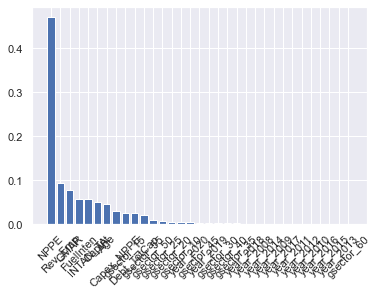

In [38]:
plt.bar(x, importances[sorted_index], tick_label= labels);
plt.xticks(rotation =45);
#plt.show();
#plt.savefig("feature_importance_revised.png",bbox_inches = "tight"); #save as png

In [39]:
i = importances[sorted_index][0:10]

In [40]:
l = labels[0:10]

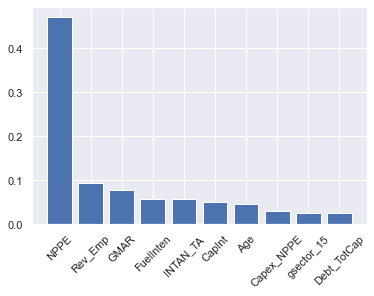

In [41]:
plt.bar(range(len(i)), i, tick_label= l);
plt.xticks(rotation =45);
'''
ax = plt.gca()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
'''
#plt.show();
plt.savefig("feature_importance_revised_f10_45d.png",bbox_inches = "tight"); #save as png

In [42]:
table_fi = pd.DataFrame({'Feature' : labels, 'Importance' : importances[sorted_index]})    

In [43]:
table_fi

,Feature,Importance
0,NPPE,0.471249
1,Rev_Emp,0.094563
2,GMAR,0.077897
3,FuelInten,0.057955
4,INTAN_TA,0.056557
5,CapInt,0.050904
6,Age,0.045448
7,Capex_NPPE,0.030780
8,gsector_15,0.026062
9,Debt_TotCap,0.024586


In [44]:
print(table_fi.to_latex())#index=False, float_format="%.5f")

\begin{tabular}{llr}
\toprule
{} &      Feature &  Importance \\
\midrule
0  &         NPPE &    0.471249 \\
1  &      Rev\_Emp &    0.094563 \\
2  &         GMAR &    0.077897 \\
3  &    FuelInten &    0.057955 \\
4  &     INTAN\_TA &    0.056557 \\
5  &       CapInt &    0.050904 \\
6  &          Age &    0.045448 \\
7  &   Capex\_NPPE &    0.030780 \\
8  &   gsector\_15 &    0.026062 \\
9  &  Debt\_TotCap &    0.024586 \\
10 &   gsector\_55 &    0.019761 \\
11 &   gsector\_50 &    0.008468 \\
12 &   gsector\_25 &    0.007379 \\
13 &   gsector\_20 &    0.004837 \\
14 &   gsector\_10 &    0.004793 \\
15 &    year\_2020 &    0.004787 \\
16 &   gsector\_45 &    0.002703 \\
17 &    year\_2019 &    0.002048 \\
18 &   gsector\_30 &    0.001879 \\
19 &   gsector\_40 &    0.001641 \\
20 &   gsector\_35 &    0.001525 \\
21 &    year\_2018 &    0.000767 \\
22 &    year\_2008 &    0.000533 \\
23 &    year\_2014 &    0.000466 \\
24 &    year\_2009 &    0.000409 \\
25 &    year\_2017 &    0.00033

In [45]:
preds

array([11.53926473, 11.37442208, 11.62635238, ..., 11.09773683,
       10.09814143,  9.81597431])

In [46]:
y_test

ISIN          year_i
AT0000APOST4  2013      10.857998
AT00000VIE62  2012      12.699207
              2013      12.636230
AT000AGRANA3  2020      13.740795
AT0000946652  2020       9.226233
                          ...    
SE0000949331  2017      10.360912
SE0000112724  2017      11.863582
SE0000695876  2017      11.325427
SE0007691613  2017      10.493856
              2018      10.717453
Name: scope_total, Length: 1512, dtype: float64

In [47]:
y_test_df = pd.DataFrame(y_test)
y_test_df

scope_total
ISIN         year_i             
AT0000APOST4 2013      10.857998
AT00000VIE62 2012      12.699207
             2013      12.636230
AT000AGRANA3 2020      13.740795
AT0000946652 2020       9.226233
...                          ...
SE0000949331 2017      10.360912
SE0000112724 2017      11.863582
SE0000695876 2017      11.325427
SE0007691613 2017      10.493856
             2018      10.717453

[1512 rows x 1 columns]

In [48]:
y_train_df = pd.DataFrame(y_train)
y_train_df

scope_total
ISIN         year_i             
AU000000IGO4 2018      11.352346
             2017      11.410062
AT0000831706 2013      14.422934
             2015      14.540156
AT0000746409 2014      14.629104
...                          ...
GB00BZ3CNK81 2020      14.105438
             2009      14.418679
             2010      14.335445
             2011      14.351296
             2012      14.267348

[2930 rows x 1 columns]

In [49]:
y_test_df['pred'] = preds.tolist()

In [50]:
y_test_df

scope_total       pred
ISIN         year_i                        
AT0000APOST4 2013      10.857998  11.539265
AT00000VIE62 2012      12.699207  11.374422
             2013      12.636230  11.626352
AT000AGRANA3 2020      13.740795  12.151245
AT0000946652 2020       9.226233  10.233095
...                          ...        ...
SE0000949331 2017      10.360912   8.617810
SE0000112724 2017      11.863582  11.973018
SE0000695876 2017      11.325427  11.097737
SE0007691613 2017      10.493856  10.098141
             2018      10.717453   9.815974

[1512 rows x 2 columns]

In [51]:
y_train_df['pred'] = preds_train.tolist()
y_train_df

scope_total       pred
ISIN         year_i                        
AU000000IGO4 2018      11.352346  11.362579
             2017      11.410062  11.446269
AT0000831706 2013      14.422934  14.423970
             2015      14.540156  14.520847
AT0000746409 2014      14.629104  14.655502
...                          ...        ...
GB00BZ3CNK81 2020      14.105438  14.065309
             2009      14.418679  14.408867
             2010      14.335445  14.339493
             2011      14.351296  14.341366
             2012      14.267348  14.289657

[2930 rows x 2 columns]

In [52]:
df_total = pd.concat([y_test_df,y_train_df])
df_total

scope_total       pred
ISIN         year_i                        
AT0000APOST4 2013      10.857998  11.539265
AT00000VIE62 2012      12.699207  11.374422
             2013      12.636230  11.626352
AT000AGRANA3 2020      13.740795  12.151245
AT0000946652 2020       9.226233  10.233095
...                          ...        ...
GB00BZ3CNK81 2020      14.105438  14.065309
             2009      14.418679  14.408867
             2010      14.335445  14.339493
             2011      14.351296  14.341366
             2012      14.267348  14.289657

[4442 rows x 2 columns]

In [53]:
mae = mean_absolute_error(y_test_df['scope_total'], y_test_df['pred'])
mae

0.9808960384268531

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

data_tot = pd.read_csv("SG_reg_total.csv")
data_tot

,scope_total_x,pred,GS-score,Unnamed: 0,X.1,Country,year,ISIN,X,scope1,...,iso,FuelInten,Income.group,CO2_imp,ggroup,gind,gsector,gsubind,naics,naicsh
0,10.857998,11.539265,0.976379,13,13,AUSTRIA,2013,AT0000APOST4,163,45537.0,...,AT,15.9,High income,National,2030.0,203010.0,20.0,20301010.0,492110.0,492110.0
1,12.699207,11.374422,0.000000,24,24,AUSTRIA,2012,AT00000VIE62,15,NaN,...,AT,16.5,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
2,12.636230,11.626352,0.000000,31,31,AUSTRIA,2013,AT00000VIE62,16,NaN,...,AT,15.9,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
3,13.740795,12.151245,0.000000,32,32,AUSTRIA,2020,AT000AGRANA3,176,NaN,...,AT,16.4,High income,National,3020.0,302020.0,30.0,30202030.0,31131.0,31131.0
4,9.226233,10.233095,1.736998,38,38,AUSTRIA,2020,AT0000946652,151,NaN,...,AT,16.4,High income,National,1010.0,101010.0,10.0,10101020.0,333132.0,333132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,14.105438,14.065309,0.000000,6312,6312,UNITED KINGDOM,2020,GB00BZ3CNK81,3691,1335900.0,...,GB,150.1,High income,National,1010.0,101020.0,10.0,10102040.0,483111.0,483111.0
4438,14.418679,14.408867,0.000000,6314,6314,UNITED KINGDOM,2009,GB00BZ3CNK81,3680,1827125.0,...,GB,181.4,High income,National,1010.0,101020.0,10.0,10102040.0,483111.0,483111.0
4439,14.335445,14.339493,0.004056,6316,6316,UNITED KINGDOM,2010,GB00BZ3CNK81,3681,1681258.0,...,GB,195.6,High income,National,1010.0,101020.0,10.0,10102040.0,483111.0,483111.0
4440,14.351296,14.341366,0.000000,6318,6318,UNITED KINGDOM,2011,GB00BZ3CNK81,3682,1708034.0,...,GB,163.0,High income,National,1010.0,101020.0,10.0,10102040.0,483111.0,483111.0


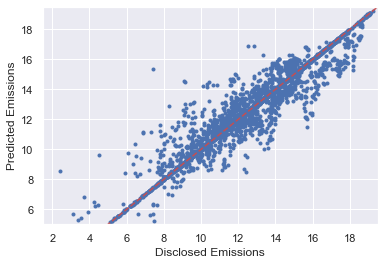

In [57]:
plt.scatter(data_tot['scope_total_x'], data_tot['pred'], marker = '.');
#plt.title('x-axis:Disclosed and y-axis: Predicted', y =1);
# make data
x = np.arange(1, 21)
y = np.arange(1,21)

# plot
#fig, ax = plt.subplots()

#ax.plot(x, y, linewidth=2.0)

plt.plot(x,y, '--r')
plt.ylim(5,19.5)
plt.xlim(1.5,19.5)

plt.xlabel('Disclosed Emissions');
plt.ylabel('Predicted Emissions');
plt.savefig('pred_disclosed_revised_tot.png')

In [58]:
data_test = pd.read_csv("SG_reg_test.csv")
data_test.head()

,scope_total_x,pred,GS-score,Unnamed: 0,X.1,Country,year,ISIN,X,scope1,...,iso,FuelInten,Income.group,CO2_imp,ggroup,gind,gsector,gsubind,naics,naicsh
0,10.857998,11.539265,0.976379,13,13,AUSTRIA,2013,AT0000APOST4,163,45537.0,...,AT,15.9,High income,National,2030.0,203010.0,20.0,20301010.0,492110.0,492110.0
1,12.699207,11.374422,0.000000,24,24,AUSTRIA,2012,AT00000VIE62,15,NaN,...,AT,16.5,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
2,12.636230,11.626352,0.000000,31,31,AUSTRIA,2013,AT00000VIE62,16,NaN,...,AT,15.9,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
3,13.740795,12.151245,0.000000,32,32,AUSTRIA,2020,AT000AGRANA3,176,NaN,...,AT,16.4,High income,National,3020.0,302020.0,30.0,30202030.0,31131.0,31131.0
4,9.226233,10.233095,1.736998,38,38,AUSTRIA,2020,AT0000946652,151,NaN,...,AT,16.4,High income,National,1010.0,101010.0,10.0,10101020.0,333132.0,333132.0


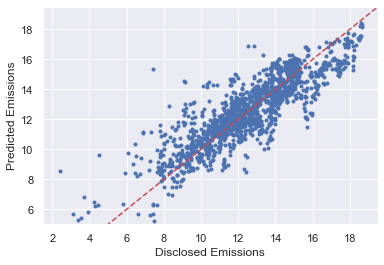

In [22]:
plt.scatter(data_test['scope_total_x'], data_test['pred'], marker ='.');
#plt.title('x-axis:Disclosed and y-axis: Predicted', y =1);
# make data
x = np.arange(1, 21)
y = np.arange(1,21)

# plot
#fig, ax = plt.subplots()

#ax.plot(x, y, linewidth=2.0)

plt.plot(x,y, '--r')
plt.ylim(5,19.5)
plt.xlim(1.5,19.5)

plt.xlabel('Disclosed Emissions');
plt.ylabel('Predicted Emissions');
plt.savefig('pred_disclosed_revised_test.png')

In [59]:
GS_A0 = data_tot[data_tot['GS-score']>0]
GS_A0['logGS'] = np.log(GS_A0['GS-score'])

<ipython-input-59-e534ea9dd7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GS_A0['logGS'] = np.log(GS_A0['GS-score'])


In [60]:
GS_A0['logGS']

0      -0.023905
4       0.552158
6       1.000567
7       1.228080
8      -0.312790
          ...   
4432   -3.653855
4433   -3.293474
4434   -3.878265
4439   -5.507564
4441   -3.791615
Name: logGS, Length: 2280, dtype: float64

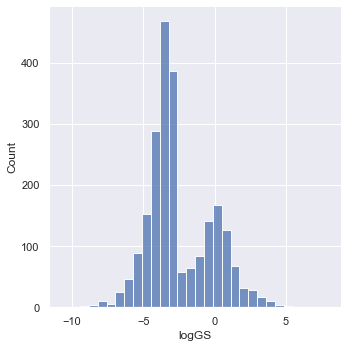

In [61]:
p = sns.displot(GS_A0, x= 'logGS', bins = 30);
plt.savefig('log_GS_tot.png')
#p.set(ylim=(0,None), xlim= (0,None))

# Score

In [62]:
score_list =[]
for i,r in y_test_df.iterrows():
    if np.exp(y_test_df.loc[i,'pred']) >= np.exp(y_test_df.loc[i,'scope_total']):
        score_list.append((np.exp(y_test_df.loc[i,'pred']) - 
                           np.exp(y_test_df.loc[i,'scope_total']))/np.exp(y_test_df.loc[i,'scope_total']))
    else:
        score_list.append(0)
score_list

[0.9763787050459867,
 0,
 0,
 0,
 1.7369977733978077,
 0,
 2.719822676210548,
 3.414667894461253,
 0.731403476997527,
 0,
 1.7528771572073747,
 0.6904031751118294,
 0.4981368647108151,
 0.2796760450046314,
 2.2514979765126495,
 0.532066708156104,
 0.2712480255215255,
 2.8575022151140224,
 0.7900806605707477,
 0.44642174540746504,
 0.03177039154788026,
 1.0981935697765572,
 0.510249991409731,
 1.331042453211585,
 1.110785531579931,
 0,
 0.06615532186814474,
 0.9594228599091595,
 3.991163955376375,
 0,
 2.2724720155877165,
 0.013119551503268208,
 0,
 0.860352375457327,
 0.5231333080174534,
 0.18866676527895732,
 1.3345214174602948,
 0.7107239825303102,
 0,
 0,
 0.6470911781736838,
 0,
 1.114375729744464,
 0,
 1.7447496150729798,
 0,
 1.5318987348817925,
 0,
 0,
 0,
 0.8347788958860649,
 2.3824948312919565,
 0,
 0,
 1.2793364767259239,
 0,
 0,
 3.1376684529841667,
 4.0090439204747454,
 0,
 0,
 0,
 1.672777688892492,
 0,
 0,
 2.0849586960975564,
 0,
 0,
 0.955975567599859,
 0,
 0,
 0,
 0.3

In [63]:
score_list_tot =[]
for i,r in df_total.iterrows():
    if np.exp(df_total.loc[i,'pred']) >= np.exp(df_total.loc[i,'scope_total']):
        score_list_tot.append((np.exp(df_total.loc[i,'pred']) - 
                           np.exp(df_total.loc[i,'scope_total']))/np.exp(df_total.loc[i,'scope_total']))
    else:
        score_list_tot.append(0)
score_list_tot

[0.9763787050459867,
 0,
 0,
 0,
 1.7369977733978077,
 0,
 2.719822676210548,
 3.414667894461253,
 0.731403476997527,
 0,
 1.7528771572073747,
 0.6904031751118294,
 0.4981368647108151,
 0.2796760450046314,
 2.2514979765126495,
 0.532066708156104,
 0.2712480255215255,
 2.8575022151140224,
 0.7900806605707477,
 0.44642174540746504,
 0.03177039154788026,
 1.0981935697765572,
 0.510249991409731,
 1.331042453211585,
 1.110785531579931,
 0,
 0.06615532186814474,
 0.9594228599091595,
 3.991163955376375,
 0,
 2.2724720155877165,
 0.013119551503268208,
 0,
 0.860352375457327,
 0.5231333080174534,
 0.18866676527895732,
 1.3345214174602948,
 0.7107239825303102,
 0,
 0,
 0.6470911781736838,
 0,
 1.114375729744464,
 0,
 1.7447496150729798,
 0,
 1.5318987348817925,
 0,
 0,
 0,
 0.8347788958860649,
 2.3824948312919565,
 0,
 0,
 1.2793364767259239,
 0,
 0,
 3.1376684529841667,
 4.0090439204747454,
 0,
 0,
 0,
 1.672777688892492,
 0,
 0,
 2.0849586960975564,
 0,
 0,
 0.955975567599859,
 0,
 0,
 0,
 0.3

In [64]:
y_test_df['GS-score'] = score_list
y_test_df

scope_total       pred  GS-score
ISIN         year_i                                  
AT0000APOST4 2013      10.857998  11.539265  0.976379
AT00000VIE62 2012      12.699207  11.374422  0.000000
             2013      12.636230  11.626352  0.000000
AT000AGRANA3 2020      13.740795  12.151245  0.000000
AT0000946652 2020       9.226233  10.233095  1.736998
...                          ...        ...       ...
SE0000949331 2017      10.360912   8.617810  0.000000
SE0000112724 2017      11.863582  11.973018  0.115648
SE0000695876 2017      11.325427  11.097737  0.000000
SE0007691613 2017      10.493856  10.098141  0.000000
             2018      10.717453   9.815974  0.000000

[1512 rows x 3 columns]

In [65]:
df_total['GS-score'] = score_list_tot
df_total

scope_total       pred  GS-score
ISIN         year_i                                  
AT0000APOST4 2013      10.857998  11.539265  0.976379
AT00000VIE62 2012      12.699207  11.374422  0.000000
             2013      12.636230  11.626352  0.000000
AT000AGRANA3 2020      13.740795  12.151245  0.000000
AT0000946652 2020       9.226233  10.233095  1.736998
...                          ...        ...       ...
GB00BZ3CNK81 2020      14.105438  14.065309  0.000000
             2009      14.418679  14.408867  0.000000
             2010      14.335445  14.339493  0.004056
             2011      14.351296  14.341366  0.000000
             2012      14.267348  14.289657  0.022559

[4442 rows x 3 columns]

In [66]:
y_test_df['GS-score'].describe()

count    1512.000000
mean        4.455197
std        73.530398
min         0.000000
25%         0.000000
50%         0.121399
75%         1.196734
max      2787.848157
Name: GS-score, dtype: float64

In [67]:
df_total['GS-score'].describe() # less variance in training data 

count    4442.000000
mean        1.525787
std        42.941876
min         0.000000
25%         0.000000
50%         0.002183
75%         0.043895
max      2787.848157
Name: GS-score, dtype: float64

In [68]:
data_all = pd.read_csv('final.csv')
data_all.head()

,Unnamed: 0,X.1,Country,year,ISIN,X,scope1,scope2,scope3,scope_total,...,iso,FuelInten,Income.group,CO2_imp,ggroup,gind,gsector,gsubind,naics,naicsh
0,1,1,AUSTRALIA,2015,AU000000IGO4,184,37181.0,18245.0,NaN,55426.0,...,AU,67.3,High income,National,1510.0,151040.0,15.0,15104020.0,212.0,212.0
1,2,2,AUSTRALIA,2018,AU000000IGO4,187,71123.0,14042.0,NaN,85165.0,...,AU,74.2,High income,National,1510.0,151040.0,15.0,15104020.0,212.0,212.0
2,3,3,AUSTRALIA,2019,AU000000IGO4,188,73963.0,130.0,11178.0,74093.0,...,AU,76.6,High income,National,1510.0,151040.0,15.0,15104020.0,212.0,212.0
3,4,4,AUSTRALIA,2017,AU000000IGO4,186,76482.0,13743.0,NaN,90225.0,...,AU,71.9,High income,National,1510.0,151040.0,15.0,15104020.0,212.0,212.0
4,5,5,AUSTRALIA,2011,AU000000IGO4,182,32675.0,21595.0,NaN,54270.0,...,AU,61.9,High income,National,1510.0,151040.0,15.0,15104020.0,212.0,212.0


In [69]:
roa = pd.read_csv('panel_roa.csv')
roa

,ISIN,year,roa
0,DK0010244508,2008,5.79
1,SE0009268154,2008,NaN
2,SE0011337708,2008,2.91
3,NL0000852564,2008,8.80
4,DE0005408116,2008,0.98
...,...,...,...
16531,IT0004171440,2020,8.25
16532,DE0005111702,2020,4.82
16533,AT0000837307,2020,1.94
16534,DE0005545503,2020,3.36


In [70]:
ctrl_roa = pd.read_csv('ctrl_roa.csv')
ctrl_roa

,ISIN,year,cur_rat,stlt_lia,cogs
0,AT000000STR1,2008,1.25,274041.0,8376563.0
1,AT000000STR1,2009,1.26,234515.0,8344762.0
2,AT000000STR1,2010,1.26,240847.0,8102134.0
3,AT000000STR1,2011,1.20,433304.0,9140145.0
4,AT000000STR1,2012,1.23,384002.0,8555381.0
...,...,...,...,...,...
3141,SE0015961909,2016,1.44,2307277.0,11545714.0
3142,SE0015961909,2017,1.24,2982108.0,12155719.0
3143,SE0015961909,2018,1.13,5502442.0,14103723.0
3144,SE0015961909,2019,1.18,5114621.0,14300425.0


In [71]:
roa_tot = ctrl_roa.merge(roa, on = ['ISIN', 'year'])
roa_tot

,ISIN,year,cur_rat,stlt_lia,cogs,roa
0,AT000000STR1,2008,1.25,274041.0,8376563.0,2.70
1,AT000000STR1,2009,1.26,234515.0,8344762.0,2.43
2,AT000000STR1,2010,1.26,240847.0,8102134.0,2.42
3,AT000000STR1,2011,1.20,433304.0,9140145.0,2.61
4,AT000000STR1,2012,1.23,384002.0,8555381.0,1.36
...,...,...,...,...,...,...
3141,SE0015961909,2016,1.44,2307277.0,11545714.0,7.77
3142,SE0015961909,2017,1.24,2982108.0,12155719.0,8.26
3143,SE0015961909,2018,1.13,5502442.0,14103723.0,8.43
3144,SE0015961909,2019,1.18,5114621.0,14300425.0,7.35


In [72]:
df_roareg_test = roa_tot.merge(y_test_df, left_on = ['ISIN', 'year'], right_index = True, how= 'inner')

In [73]:
df_roareg_test

,ISIN,year,cur_rat,stlt_lia,cogs,roa,scope_total,pred,GS-score
63,AT000AGRANA3,2019,1.94,144639.0,1699876.0,1.27,13.730843,12.132442,0.000000
64,AT000AGRANA3,2020,2.04,126814.0,1692615.0,2.24,13.740795,12.151245,0.000000
65,BE0003470755,2008,1.35,627000.0,5910000.0,4.58,16.700311,15.388287,0.000000
66,BE0003470755,2009,2.62,185000.0,4253000.0,4.36,16.600522,15.809853,0.000000
67,BE0003470755,2010,3.47,212000.0,4790000.0,15.06,16.588099,15.383684,0.000000
...,...,...,...,...,...,...,...,...,...
3053,SE0010468116,2019,0.80,3888000.0,4419000.0,3.73,9.650716,10.306269,0.926208
3054,SE0010468116,2020,0.79,3347000.0,4350000.0,4.57,9.781246,9.898096,0.123950
3121,SE0015810247,2009,1.50,586000.0,6452000.0,37.15,11.919450,12.933786,1.757531
3122,SE0015810247,2010,1.79,63000.0,6702000.0,23.36,12.271341,12.523646,0.286990


In [74]:
df_SGreg_test = y_test_df.merge(data_all, how = 'inner', left_index=True, right_on = ['ISIN', 'year'])

In [75]:
df_SGreg_test#.isna().sum() # all esg 

,scope_total_x,pred,GS-score,Unnamed: 0,X.1,Country,year,ISIN,X,scope1,...,iso,FuelInten,Income.group,CO2_imp,ggroup,gind,gsector,gsubind,naics,naicsh
12,10.857998,11.539265,0.976379,13,13,AUSTRIA,2013,AT0000APOST4,163,45537.0,...,AT,15.9,High income,National,2030.0,203010.0,20.0,20301010.0,492110.0,492110.0
23,12.699207,11.374422,0.000000,24,24,AUSTRIA,2012,AT00000VIE62,15,NaN,...,AT,16.5,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
30,12.636230,11.626352,0.000000,31,31,AUSTRIA,2013,AT00000VIE62,16,NaN,...,AT,15.9,High income,National,2030.0,203050.0,20.0,20305010.0,48811.0,48811.0
31,13.740795,12.151245,0.000000,32,32,AUSTRIA,2020,AT000AGRANA3,176,NaN,...,AT,16.4,High income,National,3020.0,302020.0,30.0,30202030.0,31131.0,31131.0
37,9.226233,10.233095,1.736998,38,38,AUSTRIA,2020,AT0000946652,151,NaN,...,AT,16.4,High income,National,1010.0,101010.0,10.0,10101020.0,333132.0,333132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,10.360912,8.617810,0.000000,6273,6273,SWEDEN,2017,SE0000949331,5931,12900.0,...,SE,1.5,High income,National,2520.0,252010.0,25.0,25201020.0,337110.0,337110.0
6276,11.863582,11.973018,0.115648,6279,6279,SWEDEN,2017,SE0000112724,5642,114000.0,...,SE,1.5,High income,National,1510.0,151050.0,15.0,15105010.0,321.0,322121.0
6277,11.325427,11.097737,0.000000,6280,6280,SWEDEN,2017,SE0000695876,5885,19240.0,...,SE,1.5,High income,National,2010.0,201060.0,20.0,20106020.0,333999.0,333999.0
6280,10.493856,10.098141,0.000000,6283,6283,SWEDEN,2017,SE0007691613,6095,NaN,...,SE,1.5,High income,National,2510.0,251010.0,25.0,25101010.0,3352.0,3352.0


In [76]:
df_SGreg_test.to_csv('SG_reg_test.csv', index = False)

In [77]:
df_SGreg_all = df_total.merge(data_all, how = 'inner', left_index=True, right_on = ['ISIN', 'year'])

In [78]:
#df_SGreg_all
df_SGreg_all[df_SGreg_all.duplicated(subset=['ISIN','year'], keep='first')]

,scope_total_x,pred,GS-score,Unnamed: 0,X.1,Country,year,ISIN,X,scope1,...,iso,FuelInten,Income.group,CO2_imp,ggroup,gind,gsector,gsubind,naics,naicsh


In [79]:
df_SGreg_all.to_csv('SG_reg_total.csv', index = False)

In [80]:
sqrt_GS = np.sqrt(df_total['GS-score'])

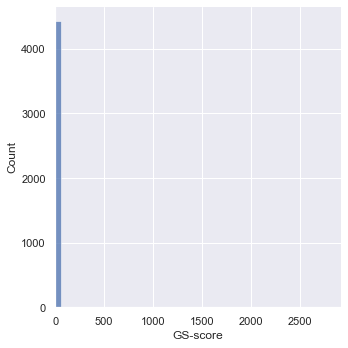

In [81]:
p = sns.displot(df_total, x='GS-score', bins = 50);
p.set(ylim=(0,None), xlim= (0,None))

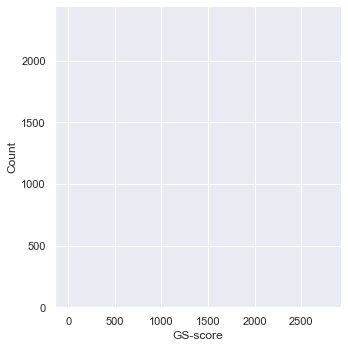

In [82]:
sns.displot(df_total, x="GS-score")

In [83]:
df_score = test.merge(y_test_df.drop(['scope_total'], axis=1), left_index = True, right_index= True)
df_score
# not the df needed for regressions 

scope_total       NPPE  Debt_TotCap   GMAR  INTAN_TA  \
ISIN         year_i                                                         
AT0000APOST4 2013      10.857998  13.330840         2.93  64.94  0.141414   
AT00000VIE62 2012      12.699207  14.336134        48.35  79.17  0.007846   
             2013      12.636230  14.303897        41.74  74.66  0.007028   
AT000AGRANA3 2020      13.740795  13.745941        29.38  27.40  0.108512   
AT0000946652 2020       9.226233  11.706533        52.06  22.69  0.176232   
...                          ...        ...          ...    ...       ...   
SE0000949331 2017      10.360912  14.128129         0.02  38.21  0.355423   
SE0000112724 2017      11.863582  17.696868        16.32  40.28  0.001658   
SE0000695876 2017      11.325427  15.394695        38.27  33.13  0.480122   
SE0007691613 2017      10.493856  14.484365        42.08  31.11  0.706656   
             2018      10.717453  14.563146        42.01  31.37  0.678234   

                     Capex_NPPE   Rev_Emp  FuelInten        Age    CapInt  \
ISIN         year_i                                                         
AT0000APOST4 2013      0.128105  4.582487       15.9  11.106329  0.556067   
AT00000VIE62 2012      0.132779  4.949132       16.5  24.402250  4.403214   
             2013      0.081670  4.986718       15.9  20.906936  4.350029   
AT000AGRANA3 2020      0.172803  5.576770       16.4  22.152054  0.985493   
AT0000946652 2020      0.258425  5.550767       16.4   8.141398  1.538919   
...                         ...       ...        ...        ...       ...   
SE0000949331 2017      0.195318  7.646661        1.5  15.602787  0.351381   
SE0000112724 2017      0.193607  8.326991        1.5  50.713644  4.295907   
SE0000695876 2017      0.127190  7.676768        1.5  24.173291  0.430566   
SE0007691613 2017      0.115266  7.378728        1.5  15.526480  0.354885   
             2018      0.144886  7.734919        1.5  10.482890  0.301740   

                     ...  year_2014  year_2015  year_2016  year_2017  \
ISIN         year_i  ...                                               
AT0000APOST4 2013    ...          0          0          0          0   
AT00000VIE62 2012    ...          0          0          0          0   
             2013    ...          0          0          0          0   
AT000AGRANA3 2020    ...          0          0          0          0   
AT0000946652 2020    ...          0          0          0          0   
...                  ...        ...        ...        ...        ...   
SE0000949331 2017    ...          0          0          0          1   
SE0000112724 2017    ...          0          0          0          1   
SE0000695876 2017    ...          0          0          0          1   
SE0007691613 2017    ...          0          0          0          1   
             2018    ...          0          0          0          0   

                     year_2018  year_2019  year_2020  gsector_60       pred  \
ISIN         year_i                                                           
AT0000APOST4 2013            0          0          0           0  11.539265   
AT00000VIE62 2012            0          0          0           0  11.374422   
             2013            0          0          0           0  11.626352   
AT000AGRANA3 2020            0          0          1           0  12.151245   
AT0000946652 2020            0          0          1           0  10.233095   
...                        ...        ...        ...         ...        ...   
SE0000949331 2017            0          0          0           0   8.617810   
SE0000112724 2017            0          0          0           0  11.973018   
SE0000695876 2017            0          0          0           0  11.097737   
SE0007691613 2017            0          0          0           0  10.098141   
             2018            1          0          0           0   9.815974   

                     GS-score  
ISIN         year_i 

In [84]:
#df_score.to_csv('df_score_revised.csv',header=True, index=True)

In [85]:
pos_count, zero_count = 0, 0

for num in y_test_df['GS-score']:
    if num > 0:
        pos_count += 1
    else:
        zero_count += 1
          
print("Positive numbers in the list: ", pos_count)
print("Zero numbers in the list: ", zero_count)

Positive numbers in the list:  820
Zero numbers in the list:  692


In [86]:
pos_count, zero_count = 0, 0

for num in df_total['GS-score']:
    if num > 0:
        pos_count += 1
    else:
        zero_count += 1
          
print("Positive numbers in the list: ", pos_count)
print("Zero numbers in the list: ", zero_count)

Positive numbers in the list:  2280
Zero numbers in the list:  2162


In [88]:
df_total[df_total['GS-score']>np.exp(2)]

,,scope_total,pred,GS-score
ISIN,year_i,,,
DK0015998017,2018,7.767264,11.619398,46.093441
DK0010274844,2018,8.187299,10.565305,9.783375
DK0015998017,2019,7.643004,9.987070,9.423539
DK0010274844,2019,9.138415,11.788428,13.154231
FI0009900682,2020,6.066108,9.731583,38.074675
...,...,...,...,...
SE0000470395,2020,3.713572,6.830511,21.577162
SE0008374250,2020,3.135494,5.707194,12.088057
SE0009888738,2020,2.397895,8.549638,468.535115


In [89]:
4442*0.025

111.05000000000001

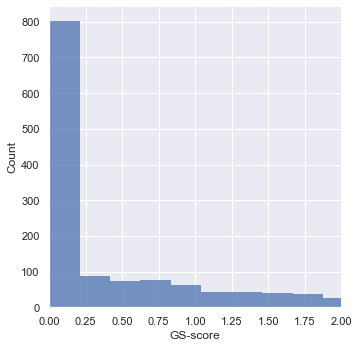

In [90]:
sns.displot(y_test_df, x="GS-score");
plt.xlim(0, 2);

In [92]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
